In [26]:
import pandas as pd 
import numpy as np

# libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns 

# libraries for model 
from sklearn.ensemble import ExtraTreesRegressor

# libraries for splitting data
from sklearn.model_selection import train_test_split

# libraries for model evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


# parameter tuning for Model
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [27]:

# Read the CSV file
csv = pd.read_csv('Data/song_prediction.csv')
csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515345 entries, 0 to 515344
Data columns (total 91 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   label               515345 non-null  int64  
 1   TimbreAvg1          515345 non-null  float64
 2   TimbreAvg2          515345 non-null  float64
 3   TimbreAvg3          515345 non-null  float64
 4   TimbreAvg4          515345 non-null  float64
 5   TimbreAvg5          515345 non-null  float64
 6   TimbreAvg6          515345 non-null  float64
 7   TimbreAvg7          515345 non-null  float64
 8   TimbreAvg8          515345 non-null  float64
 9   TimbreAvg9          515345 non-null  float64
 10  TimbreAvg10         515345 non-null  float64
 11  TimbreAvg11         515345 non-null  float64
 12  TimbreAvg12         515345 non-null  float64
 13  TimbreCovariance1   515345 non-null  float64
 14  TimbreCovariance2   515345 non-null  float64
 15  TimbreCovariance3   515345 non-nul

# What is timbre features? 
### Timbre features in the context of music and audio analysis refer to the characteristics of a sound that distinguish different types of sound production, such as voices, musical instruments, or environmental sounds, beyond their pitch, loudness, or duration. Timbre is often described as the "color" or "quality" of a sound and is a key element in the identification and differentiation of sounds.



In [28]:
filtered_data = csv[csv['label'] == 1925]
timbre_values = filtered_data.iloc[:, 1:]
filtered_data

,label,TimbreAvg1,TimbreAvg2,TimbreAvg3,TimbreAvg4,TimbreAvg5,TimbreAvg6,TimbreAvg7,TimbreAvg8,TimbreAvg9,...,TimbreCovariance69,TimbreCovariance70,TimbreCovariance71,TimbreCovariance72,TimbreCovariance73,TimbreCovariance74,TimbreCovariance75,TimbreCovariance76,TimbreCovariance77,TimbreCovariance78
140093,1925,32.70961,-137.88810,98.50586,7.34303,44.96392,-6.69900,-47.65903,2.48912,16.29667,...,16.27258,125.97229,58.23006,25.99264,-16.86793,-92.68579,-22.78359,5.90709,2.21508,0.63883
140094,1925,36.14163,-131.21658,127.63571,18.00368,19.58015,12.28968,-53.50334,-0.40787,14.44436,...,24.04407,-82.98871,209.19871,-50.37762,-29.71056,17.92655,-223.88712,13.20464,-411.64549,-1.38805
140101,1925,38.42010,-157.51909,137.31753,21.43141,7.50030,17.08911,-54.12958,-0.17305,17.40459,...,34.51479,-94.60559,284.94277,26.09602,-29.67681,48.26137,-159.46397,18.27112,-348.69500,7.62567
235243,1925,31.20666,-192.72394,64.31899,-1.90002,74.88198,29.64166,-65.95985,14.93016,7.05884,...,-18.51472,-359.13584,-155.63580,-17.66889,-61.56070,-229.70558,-1515.86323,-28.52778,-850.00343,-94.74102
235247,1925,32.00056,-27.54370,92.19362,12.05225,33.31165,11.50897,-94.77176,5.06362,30.72148,...,4.77771,-105.76437,-278.89628,16.04680,-1.42567,23.82312,-289.18904,-28.21694,-81.01903,-12.15302
235277,1925,36.43659,-114.96574,151.27819,52.36846,-35.46682,30.00004,-64.66140,20.69079,-10.37498,...,3.35884,-114.13623,-120.65458,27.01272,3.62247,-127.74161,-32.01890,0.52601,-43.46882,-2.41471
449994,1925,33.60095,-135.65938,169.99401,26.31947,-17.47162,25.24808,-16.41259,10.72471,-49.06311,...,31.22029,-146.35117,312.92218,65.44498,-34.46015,43.66989,-176.07638,12.98181,-147.35232,4.89799


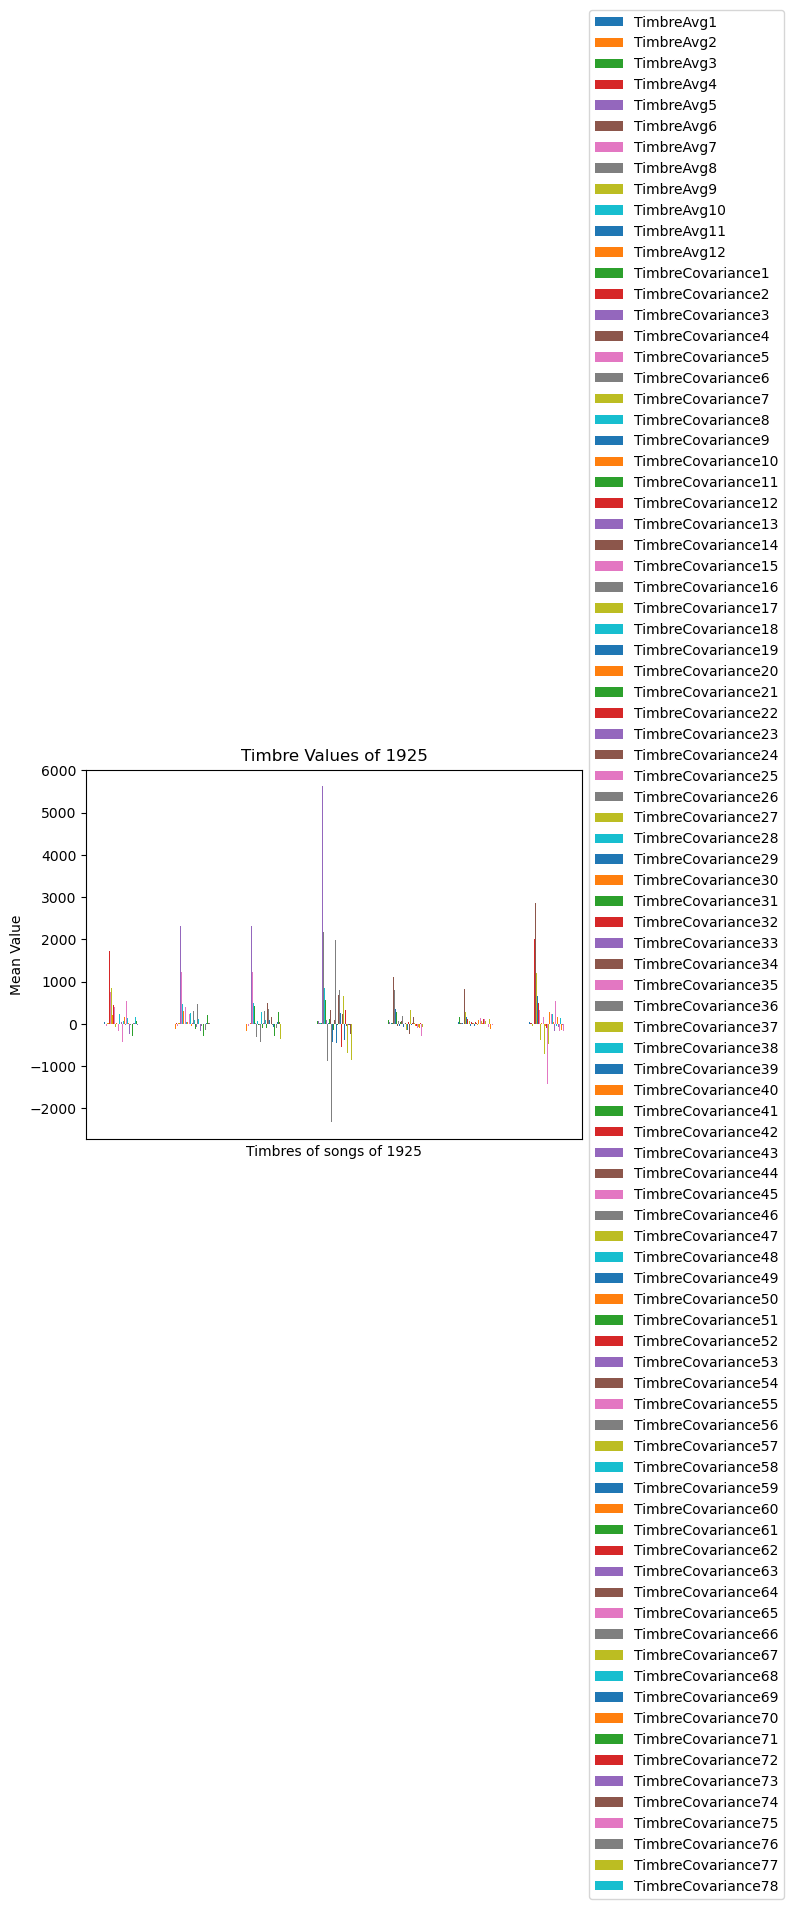

In [29]:
# Create a subplot for the bar chart
fig, ax = plt.subplots()

# Plotting on the subplot
timbre_values.plot(kind='bar', ax=ax)

# Adding a title and labels
ax.set_title('Timbre Values of 1925')
ax.set_xlabel('Timbres of songs of 1925')
ax.set_ylabel('Mean Value')
plt.gca().set_xticks([])  # 'gca' stands for 'get current axis'
# Create a new axis for the legend
legend_ax = fig.add_axes([0.9, 0.1, 0.1, 0.8]) # x, y, width, height (in figure coordinate)

# Generate the legend on the new axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Hide the axes of the legend_ax
legend_ax.axis('off')

# Show the plot
plt.show()


In [30]:
missing_values = csv.isnull().sum()

if missing_values.any(): # Check for missing values
    print('Missing values found')
    csv.dropna(inplace=True)  # Remove missing values
    print(missing_values, 'missing values removed')

In [31]:
csv = pd.DataFrame(csv.groupby('label').mean())
csv.head()

,TimbreAvg1,TimbreAvg2,TimbreAvg3,TimbreAvg4,TimbreAvg5,TimbreAvg6,TimbreAvg7,TimbreAvg8,TimbreAvg9,TimbreAvg10,...,TimbreCovariance69,TimbreCovariance70,TimbreCovariance71,TimbreCovariance72,TimbreCovariance73,TimbreCovariance74,TimbreCovariance75,TimbreCovariance76,TimbreCovariance77,TimbreCovariance78
label,,,,,,,,,,,,,,,,,,,,,
1922,41.563847,13.908623,14.684642,24.427253,18.752738,11.173280,-5.309713,0.136818,-2.164830,-4.444308,...,0.852160,-117.726955,7.403702,133.977620,7.201512,86.955653,-161.417080,14.144575,29.105555,-13.993552
1924,36.945466,-136.050156,108.086914,12.351610,-7.730282,1.872898,-32.485724,3.362986,14.375366,8.708374,...,26.805278,-103.342922,5.517028,57.540930,-3.644502,-2.221816,-117.479828,-6.521120,17.303896,-2.421044
1925,34.359443,-128.216647,120.177701,19.374040,18.185651,17.011220,-56.728221,7.616783,3.783979,8.838653,...,13.667651,-111.001374,44.301009,13.220950,-24.297050,-45.207436,-345.611747,-0.836293,-268.567001,-13.933473
1926,32.572120,-126.464657,88.917274,7.843321,-5.841375,13.394603,-31.141998,9.859703,-17.412415,4.974054,...,30.622798,-84.588056,66.738752,80.698264,-10.574744,2.554846,7.627443,-5.259586,70.703803,11.884001
1927,31.229186,-110.711278,59.213804,4.108315,-9.538370,9.985781,-21.011090,13.410433,-25.118038,4.396292,...,27.403452,-112.958466,2.670383,42.973123,-8.870979,38.038890,-67.741367,-7.575882,27.108634,0.863580


In [32]:
filtered_data =  csv.loc[[1925]]
timbre_values = filtered_data.iloc[:, 1:]
timbre_values

,TimbreAvg2,TimbreAvg3,TimbreAvg4,TimbreAvg5,TimbreAvg6,TimbreAvg7,TimbreAvg8,TimbreAvg9,TimbreAvg10,TimbreAvg11,...,TimbreCovariance69,TimbreCovariance70,TimbreCovariance71,TimbreCovariance72,TimbreCovariance73,TimbreCovariance74,TimbreCovariance75,TimbreCovariance76,TimbreCovariance77,TimbreCovariance78
label,,,,,,,,,,,,,,,,,,,,,
1925,-128.216647,120.177701,19.37404,18.185651,17.01122,-56.728221,7.616783,3.783979,8.838653,6.741246,...,13.667651,-111.001374,44.301009,13.22095,-24.29705,-45.207436,-345.611747,-0.836293,-268.567001,-13.933473


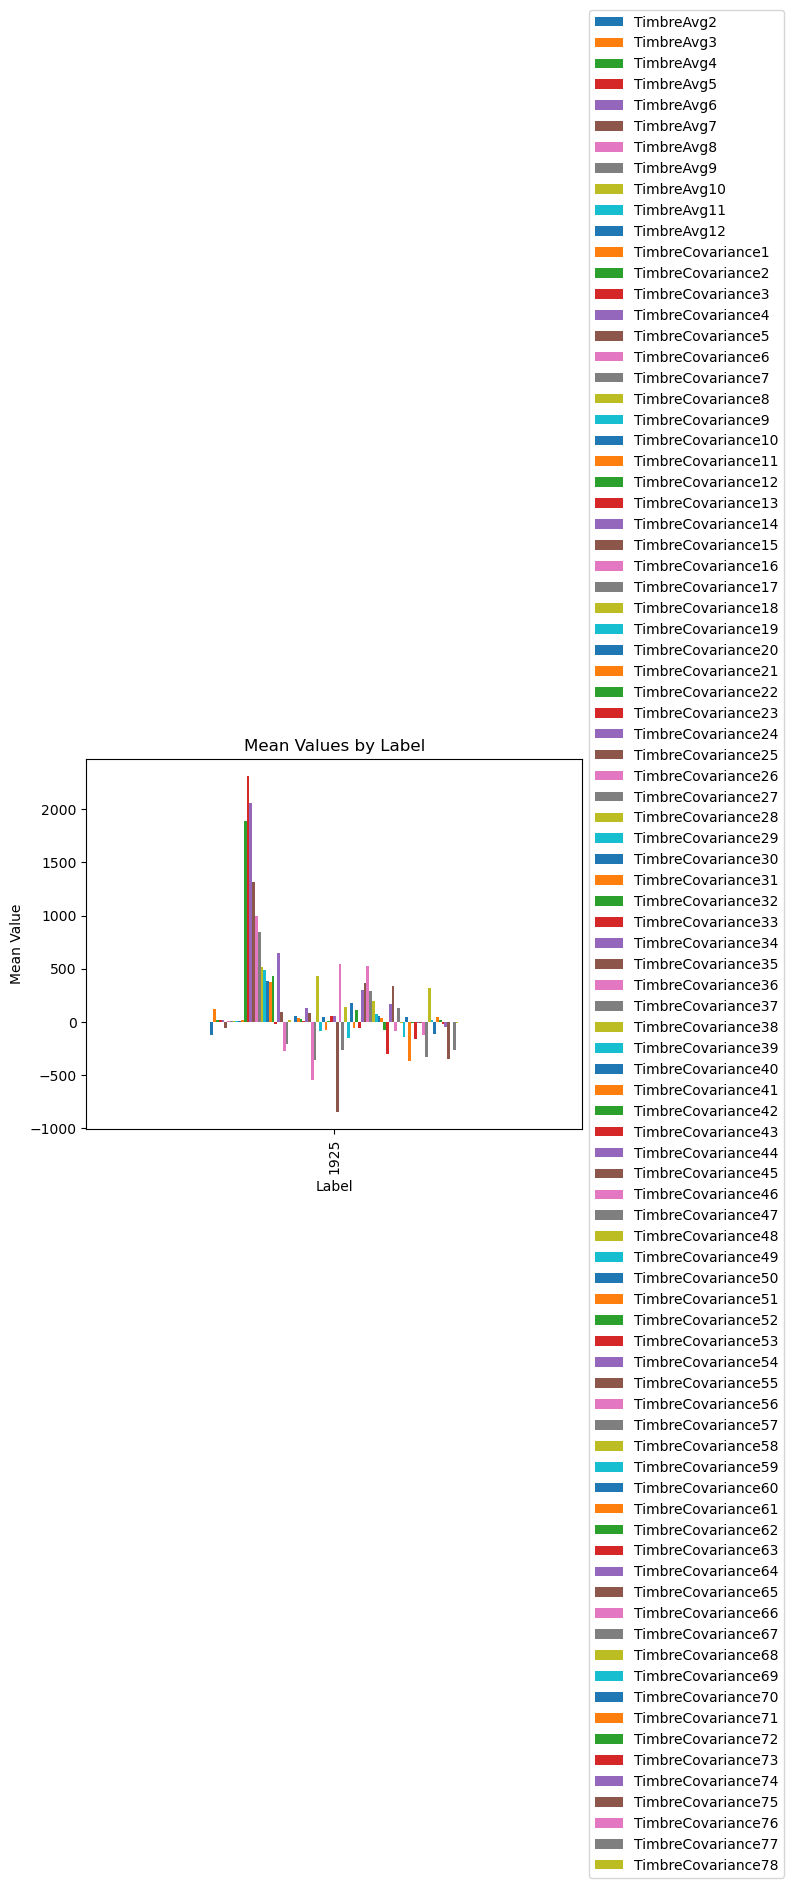

In [33]:
fig, ax = plt.subplots()

# Plotting on the subplot
timbre_values.plot(kind='bar', ax=ax)

# Adding a title and labels
ax.set_title('Mean Values by Label')
ax.set_xlabel('Label')
ax.set_ylabel('Mean Value')

# Create a new axis for the legend
legend_ax = fig.add_axes([0.9, 0.1, 0.1, 0.8]) # x, y, width, height (in figure coordinate)

# Generate the legend on the new axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Hide the axes of the legend_ax
legend_ax.axis('off')

# Show the plot
plt.show()


### Standard Scaler is a widely-used preprocessing technique in machine learning for rescaling features to a standard normal distribution,

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [35]:

data = csv
labels = csv.index
labels

Index([1922, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934,
       1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946,
       1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958,
       1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994,
       1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011],
      dtype='int64', name='label')

In [36]:

X_train, X_test, y_train, y_test = train_test_split(data, labels,train_size=0.9,random_state=100)

col = X_train.columns
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train,columns=col)

X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test,columns=col)

y_train

Index([1979, 1928, 1955, 1934, 2004, 1951, 1995, 1959, 1991, 2000, 1999, 1943,
       1946, 1929, 1986, 1963, 1935, 1948, 1960, 1965, 1997, 1944, 1974, 1956,
       1984, 1988, 2007, 1998, 2003, 2011, 1940, 2006, 1973, 1922, 1941, 1961,
       1968, 1962, 2005, 1969, 1993, 2001, 1942, 1953, 1964, 1994, 1996, 1985,
       1978, 2008, 2009, 1970, 1972, 1930, 1926, 1982, 1992, 1936, 1924, 1954,
       1927, 1950, 1925, 1932, 1939, 1981, 1983, 1938, 2010, 1957, 1937, 1989,
       1976, 1975, 1933, 1971, 2002, 1990, 1947, 1931],
      dtype='int64', name='label')

<h1> Training a model on the average of timbre features of each year<h1>

In [37]:
import warnings
warnings.filterwarnings('ignore')

# Model Before Hyperparameter Tuning
model = ExtraTreesRegressor(n_jobs= -1)
model.fit(X_train, y_train)

predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
mae = mean_absolute_error(y_test, predictions)
r_squared = r2_score(y_test, predictions)


print('MSE:',mse)
print('RMSE:',rmse)
print('mae:',mae)
print('r-squared:',r_squared)



MSE: 7.480355555555361
RMSE: 2.7350238674562535
mae: 2.044444444444429
r-squared: 0.9610898535833557


# Error anaylysis: 
### MSE is the average of the squares of the errors between the predicted values and the actual values.
### An RMSE of 7.45 means that the standard deviation of the prediction errors
### MAE is the average of the absolute errors between predicted and actual values. It gives an idea of how wrong the predictions were, on average.
### R-squared, also known as the coefficient of determination, measures the proportion of the variance in the dependent variable that is predictable from the independent variables.


<h1> Testing the model on a Song <h1>

In [38]:
song = pd.read_csv('Data/spotify_timbre_features.csv')
song_features = song.drop(columns=['label'])  # Remove the 'label' column

song_features

,TimbreAvg1,TimbreAvg2,TimbreAvg3,TimbreAvg4,TimbreAvg5,TimbreAvg6,TimbreAvg7,TimbreAvg8,TimbreAvg9,TimbreAvg10,...,TimbreCovariance69,TimbreCovariance70,TimbreCovariance71,TimbreCovariance72,TimbreCovariance73,TimbreCovariance74,TimbreCovariance75,TimbreCovariance76,TimbreCovariance77,TimbreCovariance78
0,51.187393,95.64265,7.941424,3.847361,56.83673,-5.638219,11.945037,4.141983,-18.931555,7.026463,...,36.945053,-137.686065,-28.763071,28.367181,-106.538424,-82.9337,-38.730051,-29.555597,0.762332,-66.137273


In [39]:
# Predict with your model
predicted_value = model.predict(song_features)[0]
acutal_value = song['label'][0]

# # Print the prediction
print('Predicted Value:', predicted_value)

error = int((acutal_value - predicted_value))
print('Off by:', error, 'years')

Predicted Value: 1966.64
Off by: 37 years


### Model is overfit and poorly generalizes based on averages of year


<h1> Using SMOTE to balance Dataset<h1>


In [40]:
# Read the CSV file
csv = pd.read_csv('Data/song_prediction.csv')

### We can see large amount of the dataset resides in the 2000s

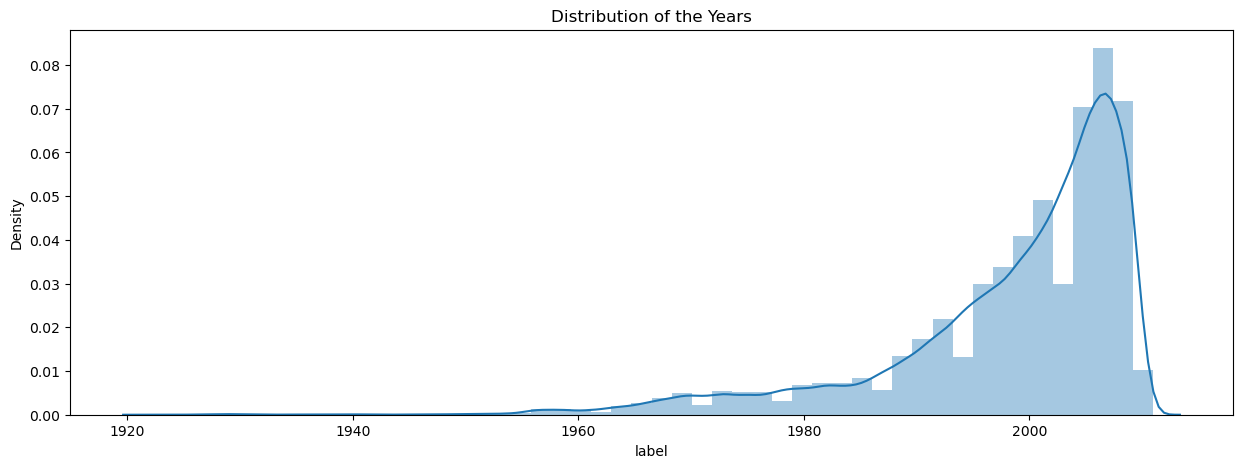

In [41]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(15,5))
sns.distplot(csv.label)
plt.title('Distribution of the Years')
plt.show()

# Oversampling Using SMOTE for Years 1920 - 1940

#### Grouping Songs from the 1920s, 1930s, and 1940s
#### This grouping is necessary to perform SMOTE effectively due to sparse data.


In [42]:

#remove 2011 due to only 1 song
csv = csv[csv['label'] != 2011]

#remove 1924 due to only 4 songs
csv = csv[csv['label'] != 1924]

In [43]:

# Step 1: Filter the dataset
subset = csv[(csv['label'] >= 1920) & (csv['label'] <= 1990)]

# Separate features and labels for the subset
X_subset = subset.drop('label', axis=1)
y_subset = subset['label']

In [44]:
y_subset.value_counts()

label
1990    7256
1989    6670
1988    5611
1987    5122
1986    4219
        ... 
1943      14
1932      11
1925       7
1922       6
1933       6
Name: count, Length: 67, dtype: int64

# 

In [45]:
# Step 2: Apply SMOTE to the subset (unchanged)
smote = SMOTE(random_state=42)
X_subset_smote, y_subset_smote = smote.fit_resample(X_subset, y_subset)

# Step 3: Combine the oversampled subset with the rest of the data
# Exclude the original subset from the full dataset
rest_of_data = csv[(csv['label'] < 1920) | (csv['label'] > 1980)]

# Create a DataFrame from the oversampled subset
oversampled_subset = pd.DataFrame(X_subset_smote, columns=X_subset.columns)
oversampled_subset['label'] = y_subset_smote  # Add the 'label' column to the oversampled subset

# Combine the oversampled subset with the rest of the data
combined_data = pd.concat([rest_of_data, oversampled_subset], ignore_index=True)


In [46]:
oversampled_data = combined_data.drop('label', axis=1)
oversampled_labels = combined_data['label']

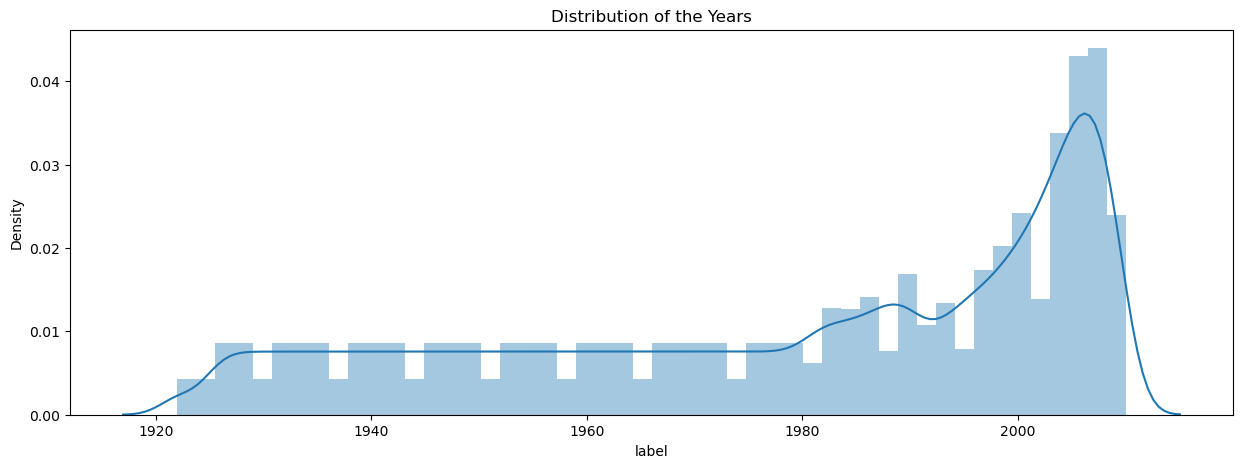

In [47]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(15,5))
sns.distplot(oversampled_labels)
plt.title('Distribution of the Years')
plt.show()

### Now datset is balanced, and gaps are due to years that are not apparent in dataset

In [48]:

# Now you can split your dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(oversampled_data, oversampled_labels, test_size=0.2, random_state=42)

# Proceed with training your model with X_train and y_train

In [49]:
# Check for null values in the training set (X_train)
null_values_in_training = X_train.isnull().sum()

# Check for null values in the testing set (X_test)
null_values_in_testing = X_test.isnull().sum()

# Print the count of null values in each dataset
if(null_values_in_training.any() or null_values_in_testing.any()):
    print('Null values found')
    print("Null values in the training set:")
    print(null_values_in_training)

    print("\nNull values in the testing set:")
    print(null_values_in_testing)


In [54]:

import warnings
warnings.filterwarnings('ignore')

# Model Before Hyperparameter Tuning
model = ExtraTreesRegressor(n_estimators= 288, random_state=2, n_jobs= -1)
model.fit(X_train, y_train)

predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
mae = mean_absolute_error(y_test, predictions)
r_squared = r2_score(y_test, predictions)

print('MSE:',mse)
print('RMSE:',rmse)
print('mae:',mae)
print('r-squared:',r_squared)


# MSE: 55.54119001684099
# RMSE: 7.452596193061918
# mae: 4.685812403877604
# r-squared: 0.9205380152221486


MSE: 55.48890863187818
RMSE: 7.449087771793146
mae: 4.68309044378101
r-squared: 0.9206128134505412


## Testing the model on a Song

In [55]:
song = pd.read_csv('Data/spotify_timbre_features.csv')
song_features = song.drop(columns=['label'])  # Remove the 'label' column

song_features

# Predict with your model
predicted_value = model.predict(song_features)[0]
acutal_value = song['label'][0]

# # Print the prediction
print('Predicted Value:', predicted_value)

error = (acutal_value - predicted_value)
print('Off by:', error, 'years')

Predicted Value: 2001.72
Off by: 2.2799999999999727 years


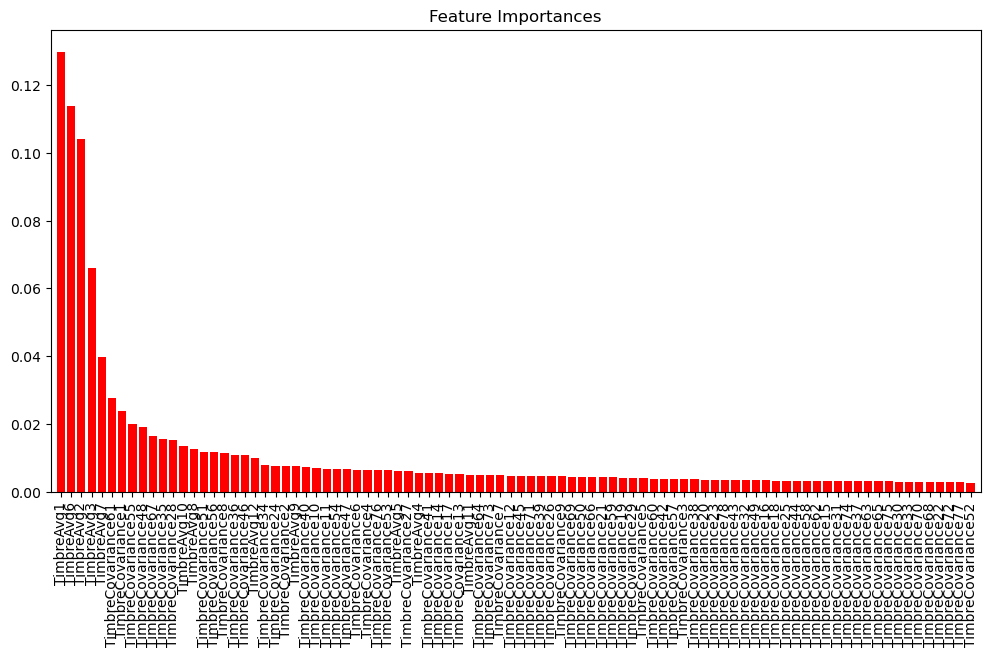

In [56]:

feature_importances = model.feature_importances_
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), feature_importances[indices],
        color="r", align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()


# Doing GridSearch

In [23]:

# Define the grid of hyperparameters to search
param_grid = {
    'n_estimators': [200, 250],  # Number of trees in the forest
    'max_features': [None, 'sqrt', 'log2'],  # Number of features to consider at every split
    'max_depth': [None, 10, 20, 40],  # Maximum number of levels in tree
}

# Setup the grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           cv=2, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
# Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [25]:
print("Best Parameters:", best_params)
print("Best Score:", grid_search.best_score_)
# Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 200}
# Best Score: -76.86691737243197

Best Parameters: {'max_depth': None, 'max_features': None, 'n_estimators': 250}
Best Score: -70.47648006224068


# Doing a Random GridSearch to find the best Parameters

In [ ]:

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

# Define the parameter grid to search
param_dist = {
    "n_estimators": (sp_randint(100, 300)),   # Number of trees in the forest
    "max_depth": sp_randint(10, 100),        # Maximum number of levels in tree
    "min_samples_split": sp_randint(2, 11),  # Minimum number of samples required to split a node
    "min_samples_leaf": sp_randint(1, 11),   # Minimum number of samples required at each leaf node     
}

# Create the base model to tune
model = ExtraTreesRegressor(n_jobs= -1)

# Random search of parameters
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist,n_iter=100, cv=2, verbose=2, n_jobs=-1)

# Fit the random search model
random_search.fit(X_train, y_train) # Uncomment and use this line to fit the model to your data

# You can then inspect the best parameters and best score
best_params = random_search.best_params_
best_score = random_search.best_score_


In [204]:
print('Best parameters:', best_params)
print('Best score:', best_score)

# Best parameters: {'max_depth': 59, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 288}
# Best score: 0.8856760508981102

Best parameters: {'max_depth': 59, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 288}
Best score: 0.8856760508981102


# Training model with Tunded model

In [38]:

import warnings
warnings.filterwarnings('ignore')

# Model After Hyperparameter Tuning
model = ExtraTreesRegressor(n_estimators=288, max_depth=59, random_state=42, n_jobs= -1)
model.fit(X_train, y_train)

predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
mae = mean_absolute_error(y_test, predictions)
r_squared = r2_score(y_test, predictions)


print('MSE:',mse)
print('RMSE:',rmse)
print('mae:',mae)
print('r-squared:',r_squared)

#n_estimators=288
# MSE: 57.982338021389126
# RMSE: 7.614613451869315
# mae: 4.854722040512714
# r-squared: 0.9169044414478269


MSE: 54.82773226812765
RMSE: 7.404575090315963
mae: 4.665935883286011
r-squared: 0.921558749001002


# Testing song on tuned model

In [39]:
song = pd.read_csv('Data/spotify_timbre_features.csv')
song_features = song.drop(columns=['label'])  # Remove the 'label' column

song_features

# Predict with your model
predicted_value = model.predict(song_features)[0]
acutal_value = song['label'][0]

# # Print the prediction
print('Predicted Value:', predicted_value)

error = (acutal_value - predicted_value)
print('Off by:', error, 'years')

Predicted Value: 1998.454861111111
Off by: 5.545138888888914 years


### This increased a little bit of the accuracy but prediction was off for larger year

<h1>Method 2<h1>

In [105]:
# Read the CSV file
csv = pd.read_csv('Data/song_prediction.csv')

In [113]:
#remove 2011 due to only 1 song
csv = csv[csv['label'] != 2011]

In [114]:
# Step 1: Filter the dataset
subset = csv[(csv['label'] >= 1960) & (csv['label'] <= 2000) & (csv['label'] <= 2010)]

# Separate features and labels for the subset
X_subset = subset.drop('label', axis=1)
y_subset = subset['label']

In [118]:
# Step 2: Apply SMOTE to the subset (unchanged)
smote = SMOTE(random_state=42)
X_subset_smote, y_subset_smote = smote.fit_resample(X_subset, y_subset)

# Step 3: Combine the oversampled subset with the rest of the data
# Exclude the original subset from the full dataset
rest_of_data = csv[(csv['label'] > 2000 ) & (csv['label'] != 2010 )]

# Create a DataFrame from the oversampled subset
oversampled_subset = pd.DataFrame(X_subset_smote, columns=X_subset.columns)
oversampled_subset['label'] = y_subset_smote  # Add the 'label' column to the oversampled subset

# Combine the oversampled subset with the rest of the data
combined_data = pd.concat([rest_of_data, oversampled_subset], ignore_index=True)


In [119]:
droped_years_data = combined_data.drop('label', axis=1)
droped_years_labels = combined_data['label']

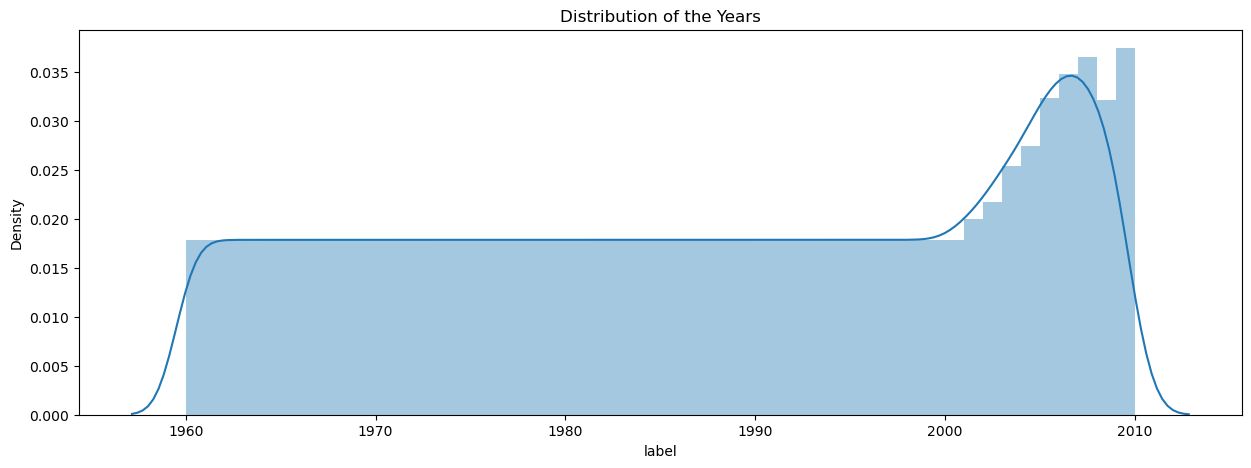

In [110]:
plt.figure(figsize=(15,5))
sns.distplot(droped_years_labels)
plt.title('Distribution of the Years')
plt.show()

In [64]:

# Now you can split your dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(droped_years_data, droped_years_labels, test_size=0.1, random_state=42)

# Proceed with training your model with X_train and y_train

In [65]:

import warnings
warnings.filterwarnings('ignore')

model = ExtraTreesRegressor(n_jobs= -1)
model.fit(X_train, y_train)

predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
mae = mean_absolute_error(y_test, predictions)
r_squared = r2_score(y_test, predictions)


print('MSE:',mse)
print('RMSE:',rmse)
print('mae:',mae)
print('r-squared:',r_squared)


MSE: 46.72846308184643
RMSE: 6.835822048725847
mae: 4.807500771747854
r-squared: 0.7984918252230419


In [66]:
song = pd.read_csv('Data/spotify_timbre_features.csv')
song_features = song.drop(columns=['label'])  # Remove the 'label' column

song_features

# Predict with your model
predicted_value = model.predict(song_features)[0]
acutal_value = song['label'][0]

# # Print the prediction
print('Predicted Value:', predicted_value)

error = (acutal_value - predicted_value)
print('Off by:', error, 'years')

Predicted Value: 2000.96
Off by: 3.0399999999999636 years


# UnderSampling Majority class to gain a higher balanced dataset

In [ ]:
# Assuming 'df' is your DataFrame and 'label' is the column with labels
max_points_per_label = 19285

# Empty DataFrame to store the result
result_df = pd.DataFrame()

# Group by label and process each group
for label, group in combined_data.groupby('label'):
    if len(group) > max_points_per_label:
        sampled_group = group.sample(n=max_points_per_label, random_state=42)
        result_df = pd.concat([result_df, sampled_group], ignore_index=True)
    else:
        result_df = pd.concat([result_df, group], ignore_index=True)

# 'result_df' now contains the processed data

In [79]:
# Step 1: Filter the dataset
subset = csv[(csv['label'] >= 1995) & (csv['label'] <= 2010)]

# Separate features and labels for the subset
X_subset = subset.drop('label', axis=1)
y_subset = subset['label']

In [84]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_balanced, y_balanced = rus.fit_resample(droped_years_data, droped_years_labels)

In [80]:


# Step 3: Combine the oversampled subset with the rest of the data
# Exclude the original subset from the full dataset
rest_of_data = combined_data[(combined_data['label'] < 1995) & (combined_data['label'] >= 1960)]

# Create a DataFrame from the oversampled subset
oversampled_subset = pd.DataFrame(X_balanced, columns=X_subset.columns)
oversampled_subset['label'] = y_balanced  # Add the 'label' column to the oversampled subset

# Combine the oversampled subset with the rest of the data
combined_data = pd.concat([rest_of_data, oversampled_subset], ignore_index=True)

droped_years_data = combined_data.drop('label', axis=1)
droped_years_labels = combined_data['label']

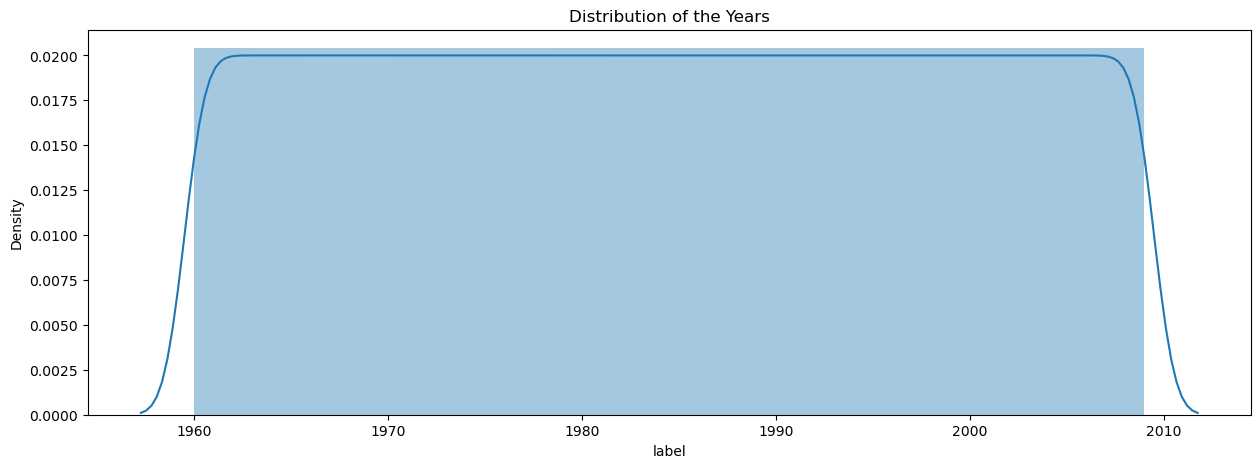

In [122]:
plt.figure(figsize=(15,5))
sns.distplot(result_df.label)
plt.title('Distribution of the Years')
plt.show()

In [123]:
X_balanced = result_df.drop('label', axis=1)
y_balanced = result_df['label']

# Now you can split your dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)

# Proceed with training your model with X_train and y_train

In [124]:

import warnings
warnings.filterwarnings('ignore')

model = ExtraTreesRegressor(n_jobs= -1)
model.fit(X_train, y_train)

predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
mae = mean_absolute_error(y_test, predictions)
r_squared = r2_score(y_test, predictions)


print('MSE:',mse)
print('RMSE:',rmse)
print('mae:',mae)
print('r-squared:',r_squared)


MSE: 48.17326477711521
RMSE: 6.940696274662594
mae: 4.873549874686716
r-squared: 0.7684452256686055


In [125]:
song = pd.read_csv('Data/spotify_timbre_features.csv')
song_features = song.drop(columns=['label'])  # Remove the 'label' column

song_features

# Predict with your model
predicted_value = model.predict(song_features)[0]
acutal_value = song['label'][0]

# # Print the prediction
print('Predicted Value:', predicted_value)

error = (acutal_value - predicted_value)
print('Off by:', error, 'years')

Predicted Value: 1998.17
Off by: 5.829999999999927 years


<h1>Ensemble Method<h1>
<h3>For this mehtod we will train different models on ranges of years due to the uneven data distrubution<h3>

In [198]:
# Read the CSV file
csv = pd.read_csv('Data/song_prediction.csv')
csv.head()

,label,TimbreAvg1,TimbreAvg2,TimbreAvg3,TimbreAvg4,TimbreAvg5,TimbreAvg6,TimbreAvg7,TimbreAvg8,TimbreAvg9,...,TimbreCovariance69,TimbreCovariance70,TimbreCovariance71,TimbreCovariance72,TimbreCovariance73,TimbreCovariance74,TimbreCovariance75,TimbreCovariance76,TimbreCovariance77,TimbreCovariance78
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903


In [199]:
range1 = pd.DataFrame(csv[(csv['label'] >= 1925) & (csv['label'] <= 1940)])
range2 = pd.DataFrame(csv[(csv['label'] >= 1941) & (csv['label'] <= 1960)])
range3 = pd.DataFrame(csv[(csv['label'] >= 1961) & (csv['label'] <= 1980)])
range4 = pd.DataFrame(csv[(csv['label'] >= 1981) & (csv['label'] <= 2000)])
range5 = pd.DataFrame(csv[(csv['label'] >= 2001) & (csv['label'] <= 2011)])

range1.label.value_counts()

label
1929    93
1928    52
1940    52
1927    42
1930    40
1939    35
1931    35
1934    29
1937    28
1936    25
1935    24
1926    19
1938    19
1932    11
1925     7
1933     6
Name: count, dtype: int64

In [200]:
csv.head()

,label,TimbreAvg1,TimbreAvg2,TimbreAvg3,TimbreAvg4,TimbreAvg5,TimbreAvg6,TimbreAvg7,TimbreAvg8,TimbreAvg9,...,TimbreCovariance69,TimbreCovariance70,TimbreCovariance71,TimbreCovariance72,TimbreCovariance73,TimbreCovariance74,TimbreCovariance75,TimbreCovariance76,TimbreCovariance77,TimbreCovariance78
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903


In [201]:
# Assuming 'target' is the column you want to predict
def split (data):
    X = data.drop('label', axis=1)
    y = data['label']
    return X, pd.DataFrame(y.values)

In [202]:
X1, y1 = split(range1)
X2, y2 = split(range2)
X3, y3 = split(range3)
X4, y4 = split(range4)
X5, y5 = split(range5)

In [203]:
def train_test(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    return X_train, X_test, y_train, y_test

In [204]:
X1_train, X1_test, y1_train, y1_test = train_test(X1, y1)
X2_train, X2_test, y2_train, y2_test = train_test(X2, y2)
X3_train, X3_test, y3_train, y3_test = train_test(X3, y3)
X4_train, X4_test, y4_train, y4_test = train_test(X4, y4)
X5_train, X5_test, y5_train, y5_test = train_test(X5, y5)

In [205]:
print(X1_train.shape, X1_test.shape, y1_train.shape, y1_test.shape) #1925-1940
print(X2_train.shape, X2_test.shape, y2_train.shape, y2_test.shape) #1941-1960
print(X3_train.shape, X3_test.shape, y3_train.shape, y3_test.shape) #1961-1980
print(X4_train.shape, X4_test.shape, y4_train.shape, y4_test.shape) #1981-2000
print(X5_train.shape, X5_test.shape, y5_train.shape, y5_test.shape) #2001-2011


(413, 90) (104, 90) (413, 1) (104, 1)
(3064, 90) (766, 90) (3064, 1) (766, 1)
(31328, 90) (7833, 90) (31328, 1) (7833, 1)
(146168, 90) (36543, 90) (146168, 1) (36543, 1)
(231292, 90) (57823, 90) (231292, 1) (57823, 1)


In [206]:
X1_train.head()

,TimbreAvg1,TimbreAvg2,TimbreAvg3,TimbreAvg4,TimbreAvg5,TimbreAvg6,TimbreAvg7,TimbreAvg8,TimbreAvg9,TimbreAvg10,...,TimbreCovariance69,TimbreCovariance70,TimbreCovariance71,TimbreCovariance72,TimbreCovariance73,TimbreCovariance74,TimbreCovariance75,TimbreCovariance76,TimbreCovariance77,TimbreCovariance78
66697,29.31601,-104.32639,-26.81451,-43.16646,-59.58249,42.19869,-72.75677,5.28943,7.82039,9.65877,...,104.19043,-599.18541,228.69797,527.44243,-6.31204,278.28303,242.49535,5.24939,987.20419,37.05428
179492,36.19483,-165.40710,55.72464,7.07007,-27.78123,25.60324,-23.27058,4.29914,5.66635,-0.16124,...,70.07585,-104.73089,333.32395,158.57882,-32.78797,-116.26292,-59.74643,6.02650,95.97026,12.28717
63241,38.72834,32.34656,34.00455,3.25877,15.92233,-23.19766,-43.20407,0.58445,26.97646,9.31988,...,9.79528,-25.41051,12.28265,19.42240,0.38782,-18.30327,-5.11115,-3.50502,16.67523,-1.95475
269293,35.58330,-99.74391,104.00766,25.21352,7.95120,-9.71093,-28.25200,1.75578,2.65992,6.54899,...,5.75699,-23.22758,-31.14571,-42.04166,-0.67348,48.91696,-135.25460,-7.97693,76.29598,-10.87463
43803,32.22330,-59.19978,35.85072,-1.11564,-5.67625,7.16901,-35.29464,14.14655,-21.87551,11.27796,...,-6.47157,-34.79371,-209.84952,-3.43779,-10.43507,-98.71391,-405.68406,-18.33009,-61.41150,-15.90740


In [207]:
def scale (X_train, X_test):
    scaler = StandardScaler()
    X_train = pd.DataFrame(scaler.fit_transform(X_train))
    X_test = pd.DataFrame(scaler.transform(X_test))
    return X_train, X_test

In [208]:
X1_train, X1_test = scale(X1_train, X1_test)
X2_train, X2_test = scale(X2_train, X2_test)
X3_train, X3_test = scale(X3_train, X3_test)
X4_train, X4_test = scale(X4_train, X4_test)
X5_train, X5_test = scale(X5_train, X5_test)


In [209]:
X1_train.head()

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
0,-0.851690,-0.032661,-1.857700,-2.423708,-1.263553,1.808851,-2.139255,-0.327897,0.370982,0.379538,...,1.519286,-3.159378,0.837252,3.189422,0.191213,2.129450,0.883069,0.707995,4.356916,1.033593
1,0.524461,-1.179012,0.120986,0.363686,-0.352921,0.767578,0.087872,-0.452264,0.276762,-1.051696,...,0.683442,-0.048519,1.353719,0.521979,-1.423720,-1.008020,-0.222512,0.762004,0.175924,0.035935
2,1.031305,2.532390,-0.399703,0.152214,0.898533,-2.294409,-0.809236,-0.918780,1.208895,0.330146,...,-0.793499,0.450525,-0.231044,-0.484333,0.599879,-0.229035,-0.022660,0.099555,-0.196068,-0.537752
3,0.402120,0.053342,1.278459,1.370383,0.670279,-1.448192,-0.136317,-0.771676,0.145256,-0.073702,...,-0.892441,0.464258,-0.445421,-0.928812,0.535144,0.305507,-0.498716,-0.211246,0.083627,-0.897059
4,-0.270069,0.814266,-0.355446,-0.090502,0.280056,-0.389068,-0.453271,0.784441,-0.927958,0.615530,...,-1.192054,0.391490,-1.327560,-0.649647,-0.060277,-0.868468,-1.487930,-0.930800,-0.562392,-1.099787


In [210]:
#Determine the range of years of Model to determine the best model
# X1_train, X1_test, y1_train, y1_test :1925-1940
# X2_train, X2_test, y2_train, y2_test :1941-1960
# X3_train, X3_test, y3_train, y3_test :1961-1980
# X4_train, X4_test, y4_train, y4_test :1981-2000
# X5_train, X5_test, y5_train, y5_test :2001-2011

training_data = X5_train
training_labels = y5_train

testing_data = X5_test
testing_labels = y5_test

warnings.filterwarnings('ignore')

# Model Before Hyperparameter Tuning
model = ExtraTreesRegressor(n_jobs= -1)
model.fit(training_data, training_labels)

predictions = model.predict(testing_data)

mse = mean_squared_error(testing_labels, predictions)
rmse = np.sqrt(mean_squared_error(testing_labels, predictions))
mae = mean_absolute_error(testing_labels, predictions)
r_squared = r2_score(testing_labels, predictions)


print('MSE:',mse)
print('RMSE:',rmse)
print('mae:',mae)
print('r-squared:',r_squared)


MSE: 5.898665147086802
RMSE: 2.428716769630992
mae: 2.041370388945575
r-squared: 0.08153055631368855


In [211]:
# Predict with your model
predicted_value = model.predict(song_features)[0]
acutal_value = song['label'][0]

# # Print the prediction
print('Predicted Value:', predicted_value)

error = int((acutal_value - predicted_value))
print('Off by:', error, 'years')

Predicted Value: 2004.78
Off by: 0 years


# Predicts the song year with no error when data is spliced